## Paso 1: Carga del conjunto de datos - Loading the dataset

In [104]:
import pandas as pd

# Ruta del archivo CSV
ruta_archivo = "/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/PROVINCIAS/csv_limpio/ciudad_real_limpio.csv"

# Leer el archivo CSV en un DataFrame
dataframe = pd.read_csv(ruta_archivo)

# Convertir los valores flotantes de la columna 'm2' a enteros
dataframe['m2'] = dataframe['m2'].astype(int)


dataframe.head()

,C. Autonoma,Provincia,Tipo de inmueble,Direccion,m2,Habitaciones,Precio
0,Castilla-La Mancha,Ciudad Real,Chalet,Saturno,30,5,299900
1,Castilla-La Mancha,Ciudad Real,Piso,Pozo dulce,65,2,99900
2,Castilla-La Mancha,Ciudad Real,Piso,Ruiz Morote,114,3,395000
3,Castilla-La Mancha,Ciudad Real,Atico,feria,77,2,245000
4,Castilla-La Mancha,Ciudad Real,Piso,Nuevo Parque,106,3,142000


## Paso 2: EDA - exploratory data analysis

In [105]:
# Obtener las dimensiones
dataframe.shape

(1800, 7)

- El dataframe tiene 1800 filas y 7 columnas.
- The dataframe has 1800 rows and 7 columns.



In [106]:
# Obtener información sobre tipos de datos y valores no nulos
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   C. Autonoma       1800 non-null   object
 1   Provincia         1800 non-null   object
 2   Tipo de inmueble  1800 non-null   object
 3   Direccion         1800 non-null   object
 4   m2                1800 non-null   int64 
 5   Habitaciones      1800 non-null   int64 
 6   Precio            1800 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 98.6+ KB


In [107]:
# Identificar el tipo de datos de cada columna
data_types = dataframe.dtypes

In [108]:
# Separar las columnas categóricas y numéricas
categorical_columns = list(data_types[data_types == 'object'].index)
numeric_columns = list(data_types[data_types != 'object'].index)

print(categorical_columns)
print(numeric_columns)

['C. Autonoma', 'Provincia', 'Tipo de inmueble', 'Direccion']
['m2', 'Habitaciones', 'Precio']


## duplicados - duplicates

In [109]:
import pandas as pd

# Cargar el nuevo dataset
dataframe = pd.read_csv(r'/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/PROVINCIAS/csv_limpio/ciudad_real_limpio.csv')

# Contar el número de filas antes de eliminar duplicados
num_filas_antes = len(dataframe)

# Eliminar duplicados
dataframe_sin_duplicados = dataframe.drop_duplicates()

# Contar el número de filas después de eliminar duplicados
num_filas_despues = len(dataframe_sin_duplicados)

# Verificar si se eliminaron duplicados
if num_filas_antes > num_filas_despues:
    print(f"Se eliminaron {num_filas_antes - num_filas_despues} duplicados.")
else:
    print("No se encontraron duplicados en el DataFrame.")




Se eliminaron 76 duplicados.


<Axes: >

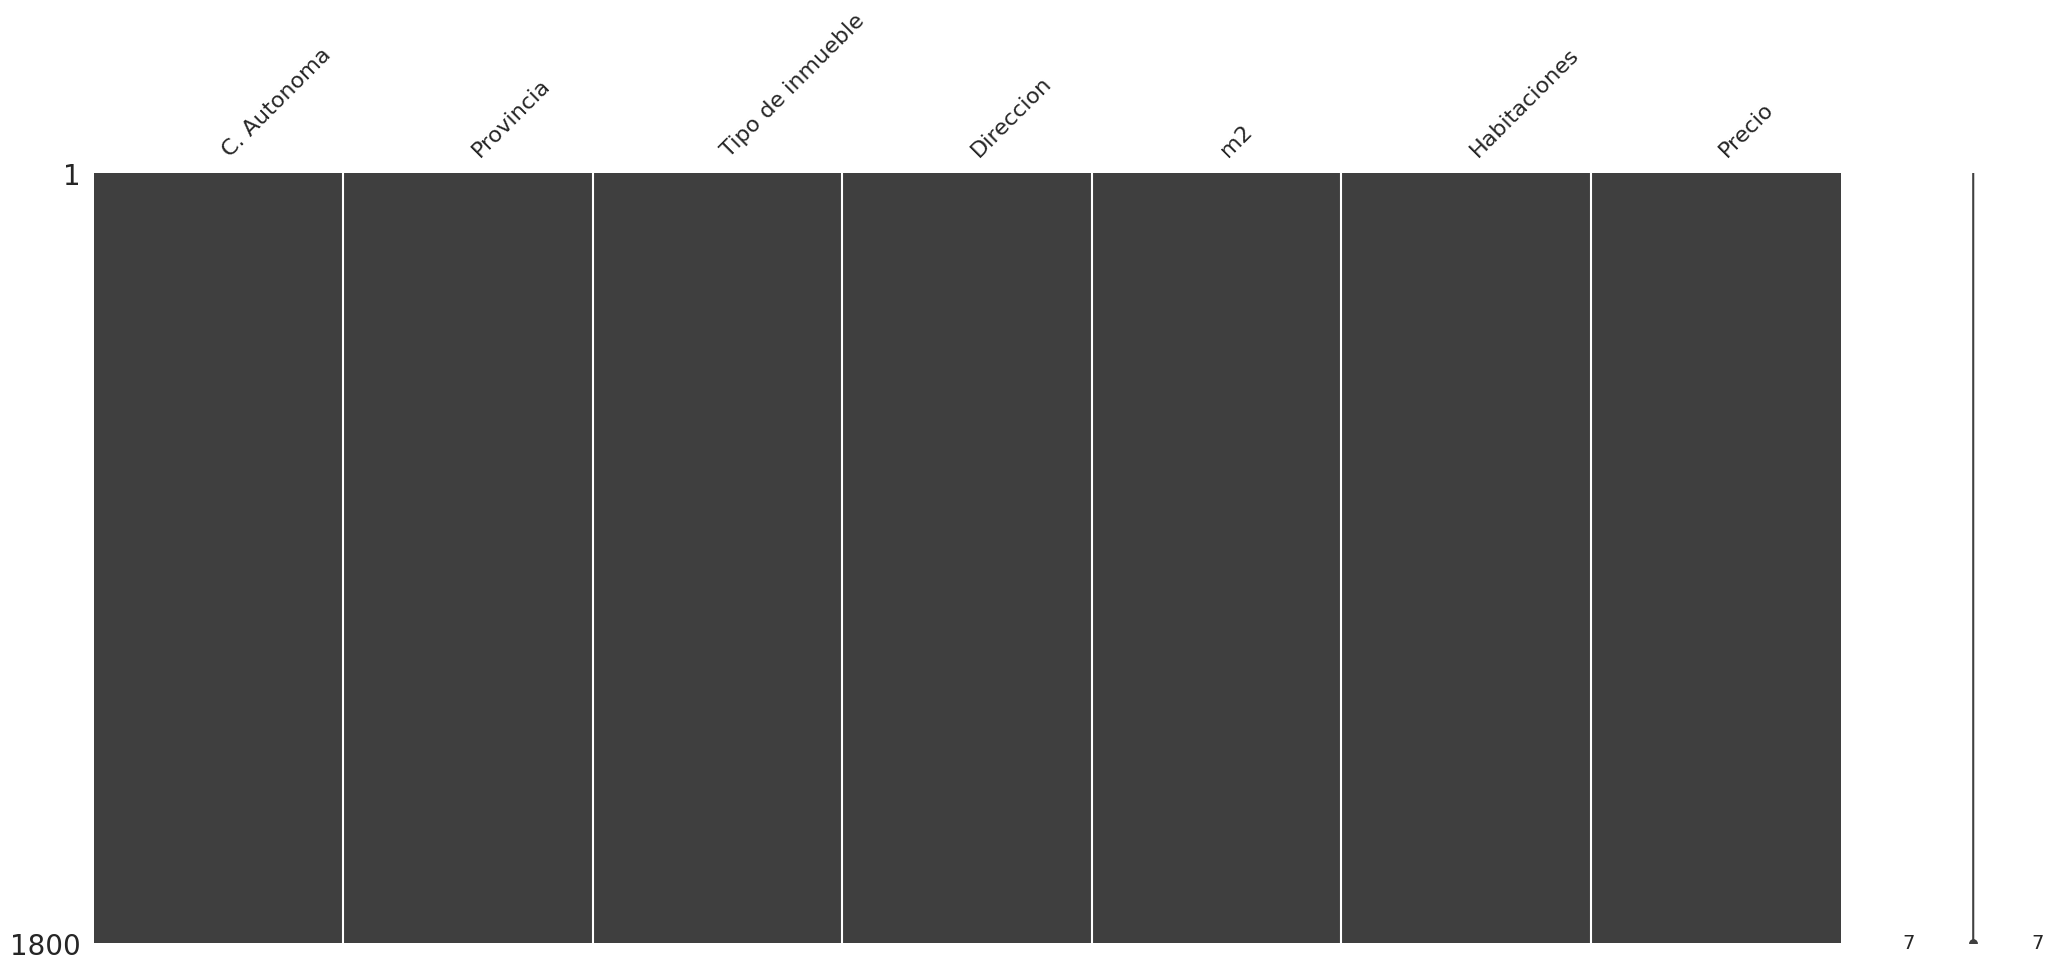

In [110]:
import missingno as msno

# Visualizar la matriz de valores faltantes
msno.matrix(dataframe)

## análisis categórico - categorical analysis

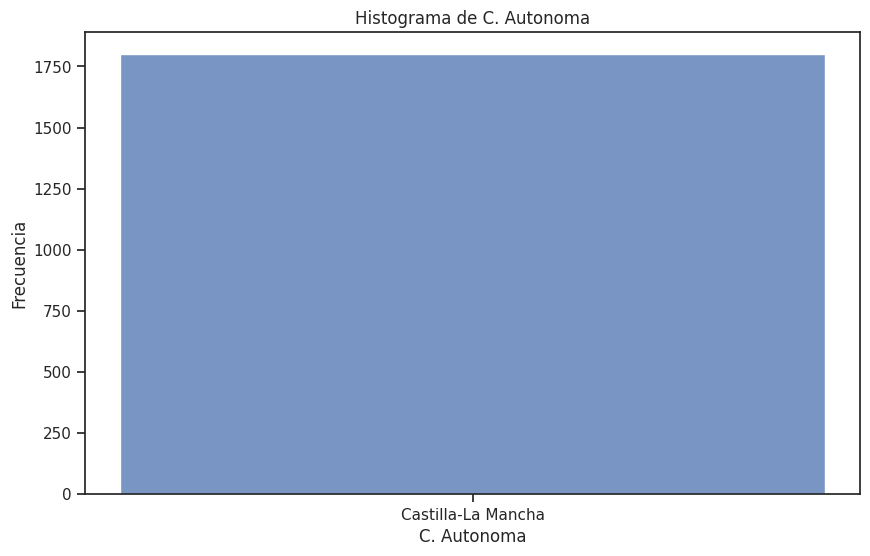

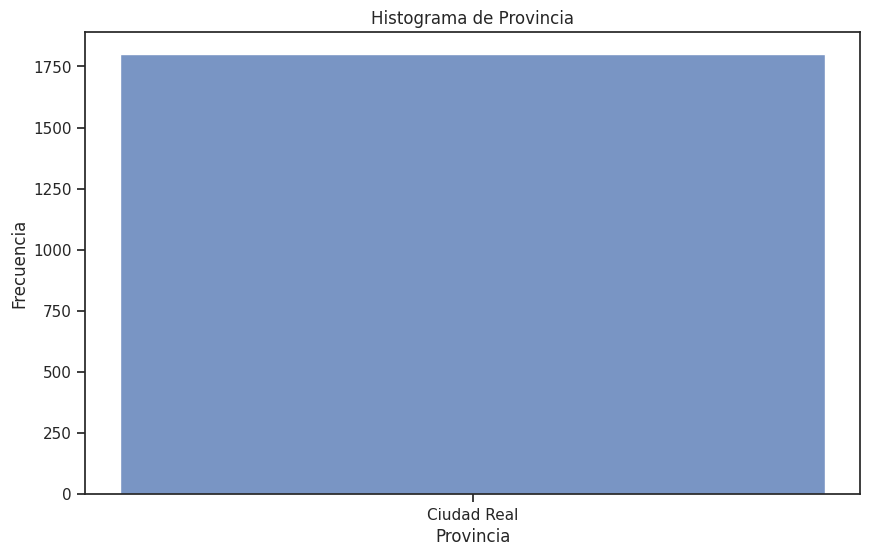

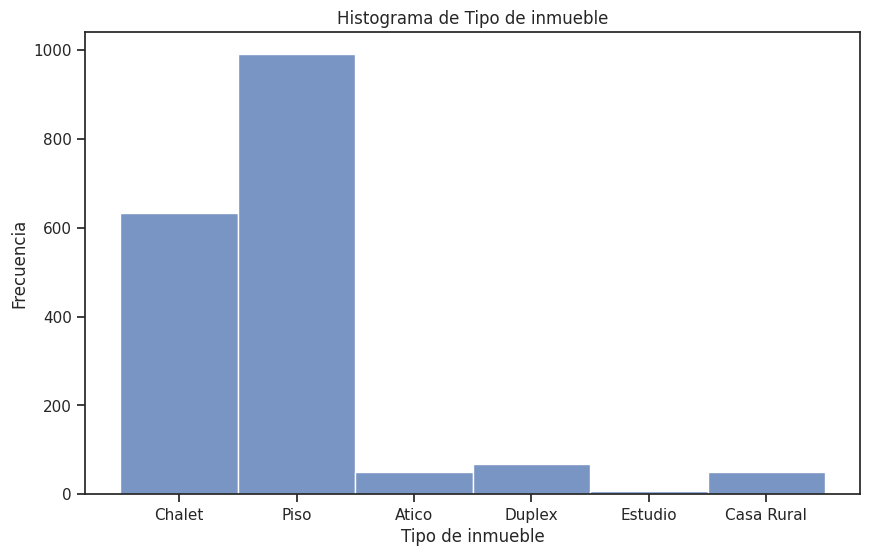

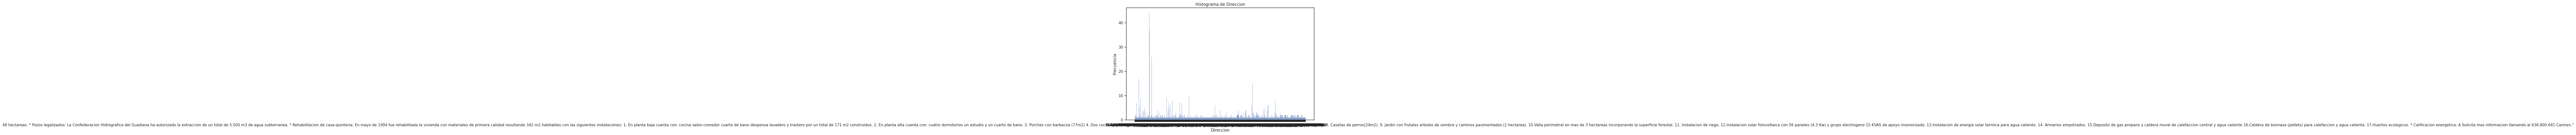

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear lienzo del gráfico con tamaño personalizado
plt.figure(figsize=(10, 6))

# Crear histograma para 'C. Autonoma'
sns.histplot(data=dataframe, x='C. Autonoma')
plt.title('Histograma de C. Autonoma')
plt.xlabel('C. Autonoma')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

# Crear un nuevo lienzo para 'Provincia'
plt.figure(figsize=(10, 6))
sns.histplot(data=dataframe, x='Provincia')
plt.title('Histograma de Provincia')
plt.xlabel('Provincia')
plt.ylabel('Frecuencia')
plt.show()

# Crear un nuevo lienzo para 'Tipo de inmueble'
plt.figure(figsize=(10, 6))
sns.histplot(data=dataframe, x='Tipo de inmueble')
plt.title('Histograma de Tipo de inmueble')
plt.xlabel('Tipo de inmueble')
plt.ylabel('Frecuencia')
plt.show()

# Crear un nuevo lienzo para 'Direccion'
plt.figure(figsize=(10, 6))
sns.histplot(data=dataframe, x='Direccion')
plt.title('Histograma de Direccion')
plt.xlabel('Direccion')
plt.ylabel('Frecuencia')
plt.show()


- En el histograma de 'com. autonoma', se excluyen Ceuta y Melilla debido a la falta de datos. La mayoría de las comunidades autónomas tienen un recuento de listados de viviendas que oscila entre 1700 y 1800.

- En el histograma de 'provincia', se muestra la provincias donde esta situada.

- En el histograma de 'tipo inmueble', se observa que la mayoría de las viviendas son pisos seguido de chalets. En un rango mas bajo tenemos ático, dúplex o casa rural.
---
- In the histogram for 'com. autonoma', Ceuta and Melilla are excluded due to lack of data. Most of the Autonomous Communities have a housing list count ranging between 1700 amd 1800.

- In the 'province' histogram, we see the province were is it.

- In the histogram of 'tipo inmueble', it can be seen that most of the dwellings are flats followed by villas. In a lower range we have penthouse, duplex or rural house.

## análisis numérico - numerical analysis

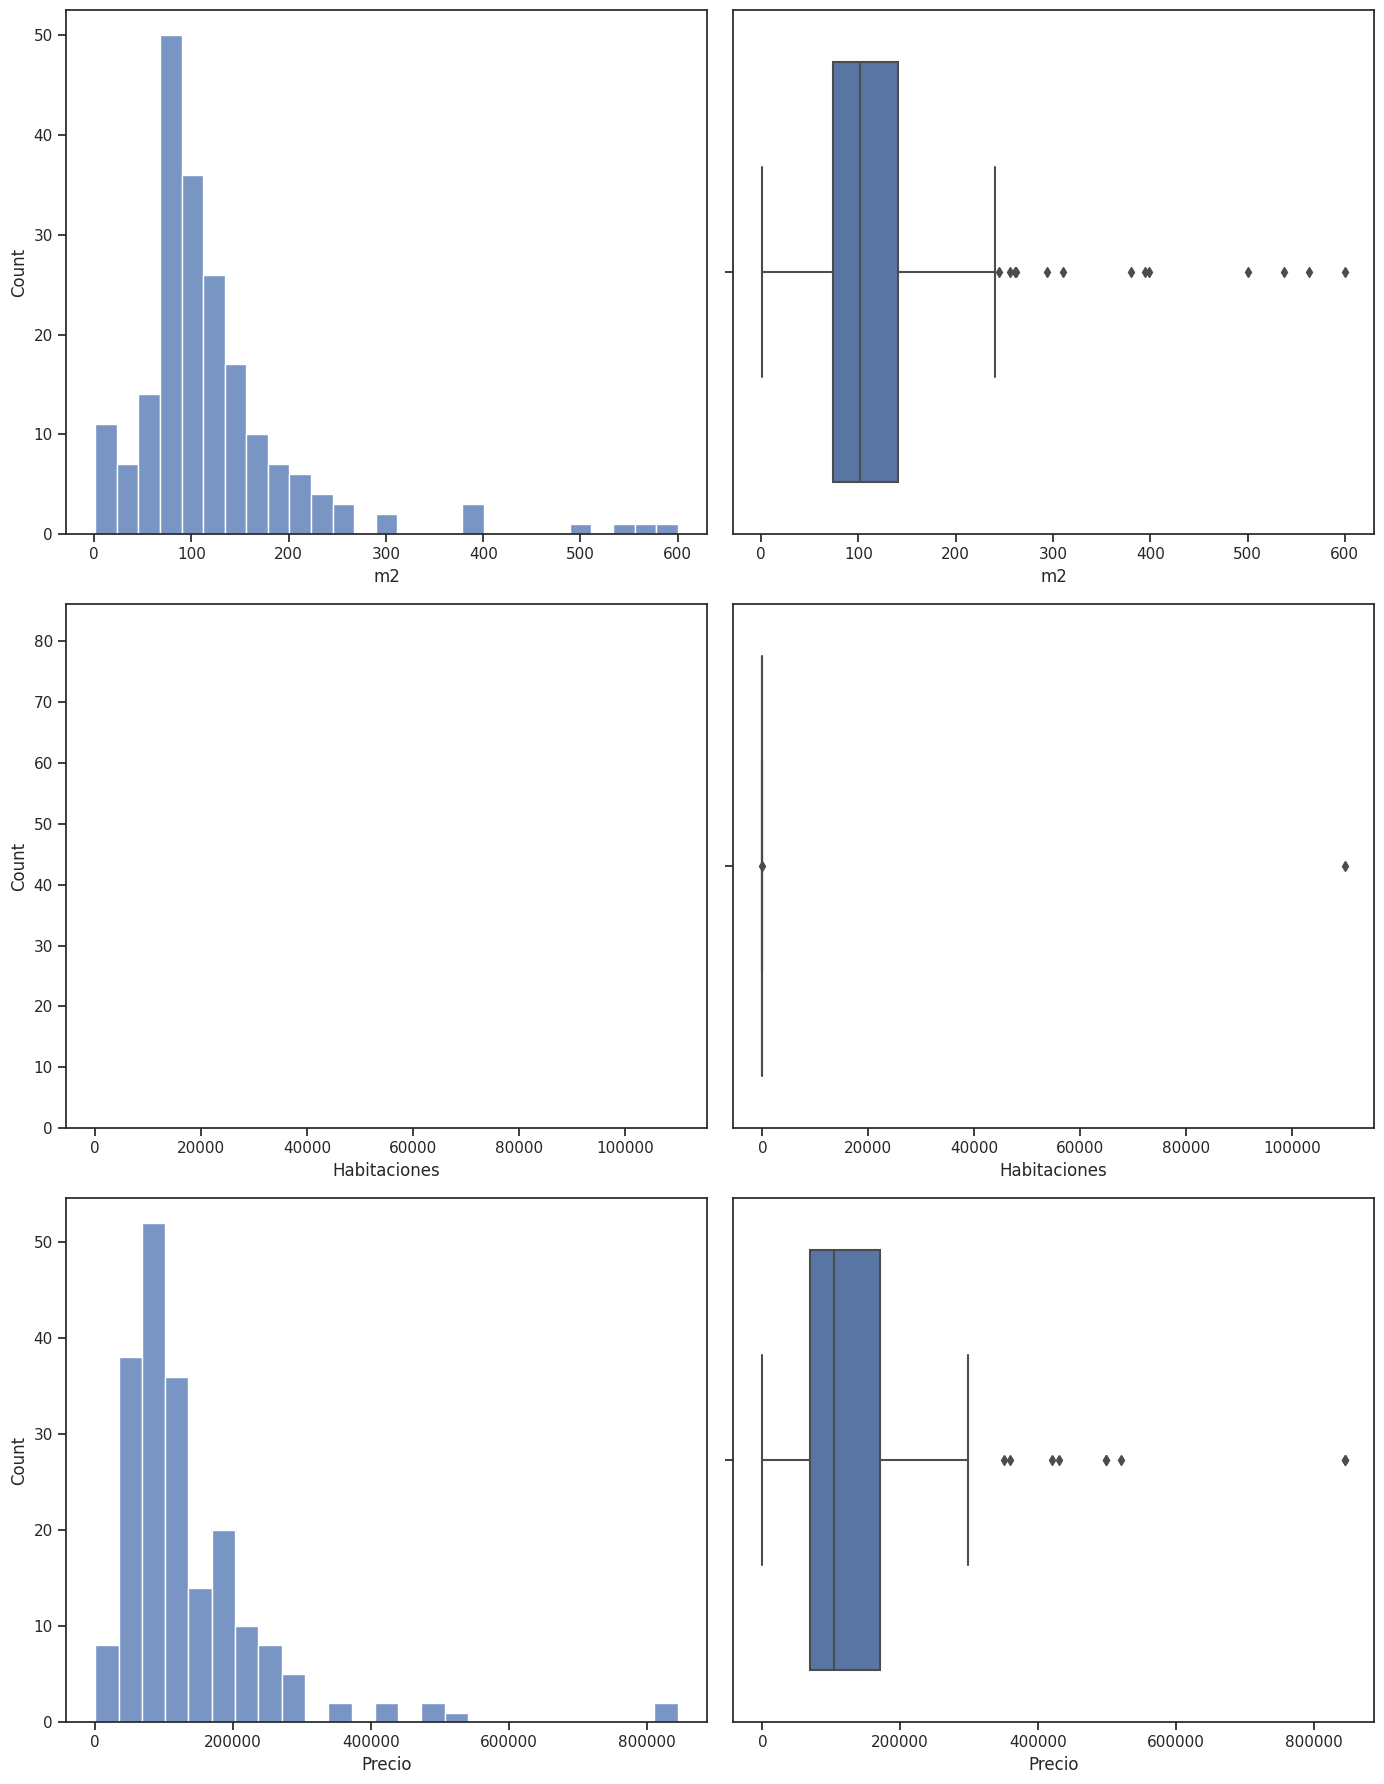

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Muestra aleatoria de los datos (ajusta el tamaño según sea necesario)
dataframe_sample = dataframe.sample(n=200)  # Cambia 1000 por el tamaño de muestra deseado

# Crear una figura de subplots con configuración de 3 filas y 2 columnas
fig, axis = plt.subplots(3, 2, figsize=(14, 18))

# Gráficos de las variables numéricas en la muestra aleatoria
sns.histplot(ax=axis[0, 0], data=dataframe_sample, x="m2")
sns.boxplot(ax=axis[0, 1], data=dataframe_sample, x="m2")
sns.histplot(ax=axis[1, 0], data=dataframe_sample, x="Habitaciones")
sns.boxplot(ax=axis[1, 1], data=dataframe_sample, x="Habitaciones")
sns.histplot(ax=axis[2, 0], data=dataframe_sample, x="Precio")
sns.boxplot(ax=axis[2, 1], data=dataframe_sample, x="Precio")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


- En "precio" y "habitaciones", se observan valores atípicos (outliers) que se encuentran fuera del rango normal por lo que prodeceremos a eliminarlos

- En "m²", los outliers están más concentrados y no son tan extremos en comparación con "precio" y "habitaciones".
---
- In "precio" and "rooms", we observe outliers that are outside the normal range, so we will proceed to eliminate them.

- In "m²", the outliers are more concentrated and not as extreme compared to "price" and "rooms".

## análisis categórico-categórico - categorical-categorical analysis

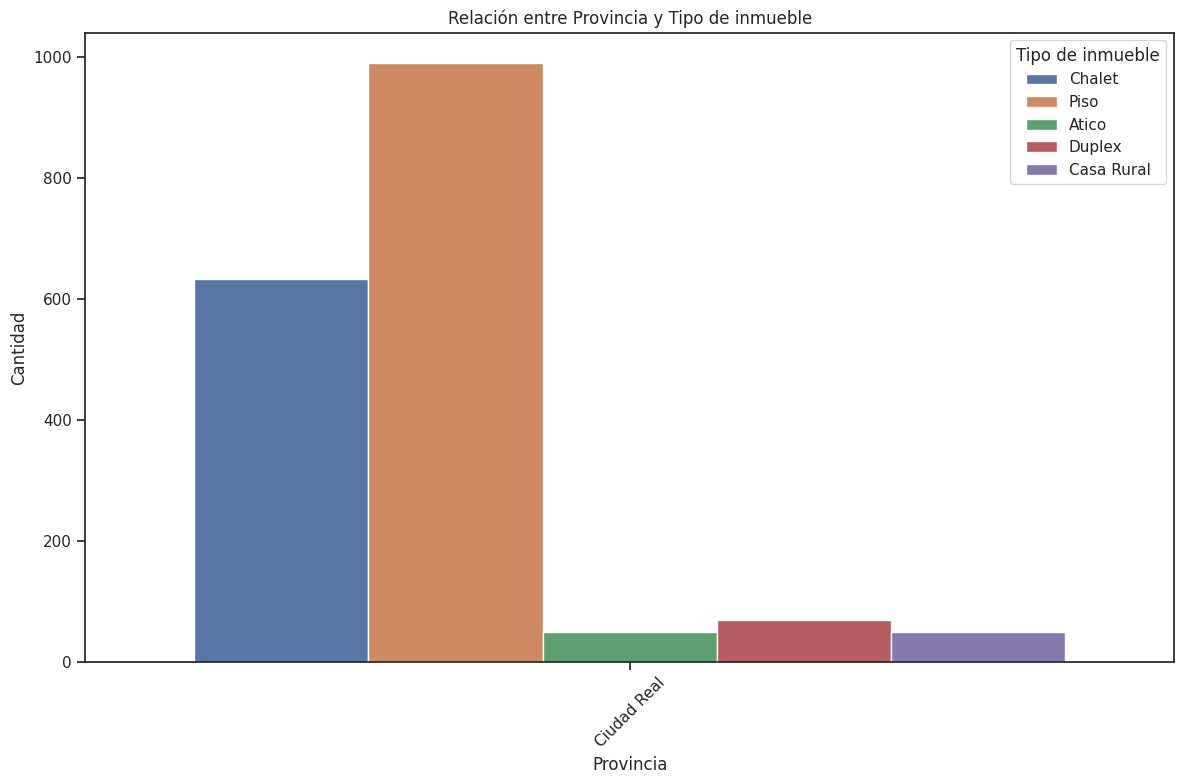

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener las 10 provincias más importantes
top_10_provincias = dataframe['Provincia'].value_counts().nlargest(5).index

# Filtrar el DataFrame solo para las 10 provincias más importantes
dataframe_top_10_provincias = dataframe[dataframe['Provincia'].isin(top_10_provincias)]

# Obtener los 5 tipos de inmuebles más comunes
top_5_tipos_inmuebles = dataframe['Tipo de inmueble'].value_counts().nlargest(5).index

# Filtrar el DataFrame solo para los 5 tipos de inmuebles más comunes
dataframe_top_5_tipos_inmuebles = dataframe_top_10_provincias[dataframe_top_10_provincias['Tipo de inmueble'].isin(top_5_tipos_inmuebles)]

# Crear una figura de subplots
fig, axes = plt.subplots(figsize=(12, 8))

# Crear un gráfico de barras para analizar 'Provincia' vs 'Tipo de inmueble' con los 5 tipos más comunes
sns.countplot(data=dataframe_top_5_tipos_inmuebles, x='Provincia', hue='Tipo de inmueble', ax=axes)
axes.set_title('Relación entre Provincia y Tipo de inmueble')
axes.set_xlabel('Provincia')
axes.set_ylabel('Cantidad')

# Rotar las etiquetas del eje x para mayor legibilidad
axes.tick_params(axis='x', rotation=45)

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


- El gráfico muestra la relación entre la provincia y el tipo de inmueble. vemos que la mayoria son pisos seguidos de chalet. en un rango mas bajo tenemos duplex y atico, y por ultimo y con menor rango casa rural.
---
- The graph shows the relationship between the province and the type of property. We can see that the majority are flats followed by villas. In a lower range we have duplexes and penthouses, and finally and with a lower range rural houses.

## análisis númerico-númerico  - numerical-numerical analysis 

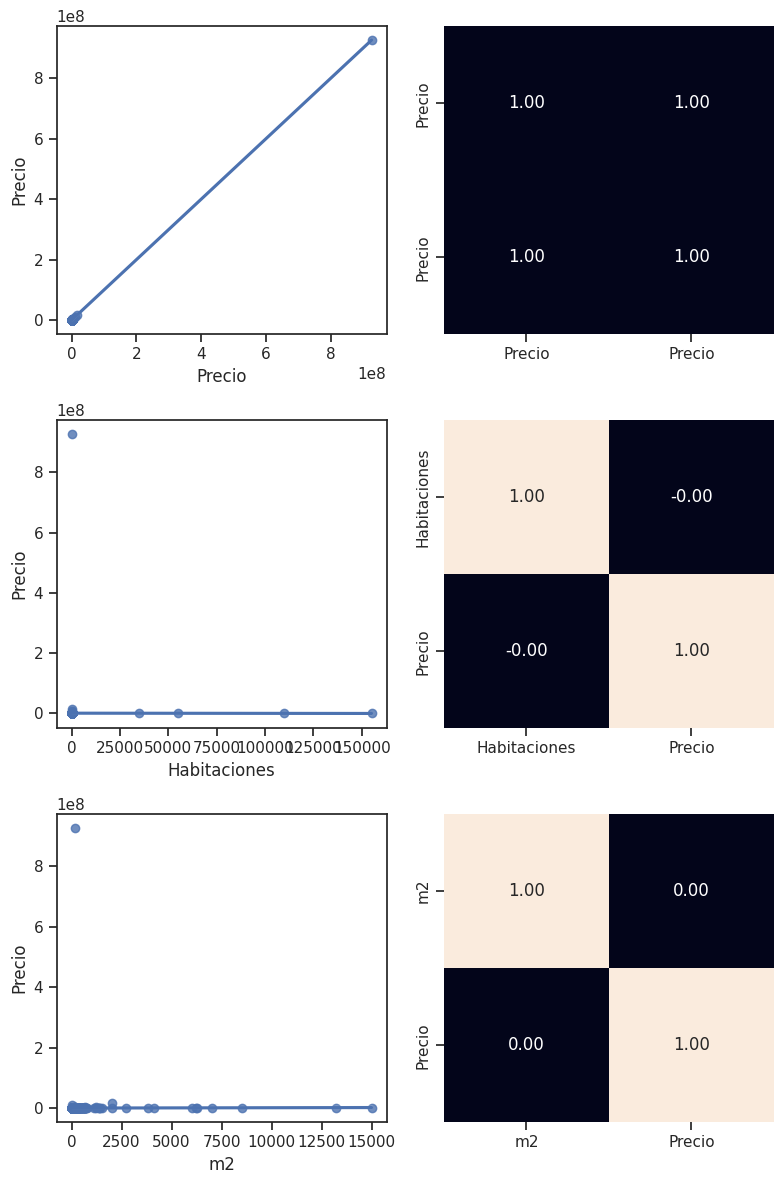

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas a incluir en el análisis
numeric_variables_vivienda = ['Precio', 'Habitaciones', 'm2']

# Crear una figura de subplots con configuración de filas y columnas
num_rows_vivienda = len(numeric_variables_vivienda)
fig_vivienda, axis_vivienda = plt.subplots(num_rows_vivienda, 2, figsize=(8, 4*num_rows_vivienda))

# Generar los gráficos de dispersión y las matrices de correlación para las variables numéricas
for i, var in enumerate(numeric_variables_vivienda):
    sns.regplot(ax=axis_vivienda[i, 0], data=dataframe, x=var, y="Precio")
    sns.heatmap(dataframe[[var, "Precio"]].corr(), annot=True, fmt=".2f", ax=axis_vivienda[i, 1], cbar=False)
    axis_vivienda[i, 0].set_ylabel("Precio")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


- La cantidad de habitaciones tiene una correlación positiva moderada con el precio (0.32), lo que sugiere que un mayor número de habitaciones tiende a aumentar el precio.
- La correlación de m² con el precio es débil (0.10), lo que indica que el tamaño de la vivienda tiene menos influencia en su precio en comparación con la cantidad de habitaciones.
---
- The number of rooms has a moderate positive correlation with price (0.32), suggesting that a higher number of rooms tends to increase the price.
- The correlation of m² with price is weak (0.10), indicating that the size of the dwelling has less influence on its price compared to the number of rooms.

## categórico a numérico - categorical to numerical

In [115]:
import pandas as pd

# Copiar el DataFrame original
dataframe_copy = dataframe.copy()

# Lista de columnas categóricas
categorical_columns = ['C. Autonoma', 'Provincia', 'Tipo de inmueble', 'Direccion']

# Convertir las columnas categóricas a numéricas usando factorize
for column in categorical_columns:
    dataframe_copy[column] = pd.factorize(dataframe_copy[column])[0]

# Calcular la correlación entre todas las columnas
correlation_matrix = dataframe_copy.corr()

# Reemplazar los NaN en la matriz de correlación con ceros
correlation_matrix = correlation_matrix.fillna(0)

# Mostrar la matriz de correlación
print(correlation_matrix)


                  C. Autonoma  Provincia  Tipo de inmueble  Direccion    m2  \
C. Autonoma              0.00       0.00              0.00       0.00  0.00   
Provincia                0.00       0.00              0.00       0.00  0.00   
Tipo de inmueble         0.00       0.00              1.00      -0.03  0.02   
Direccion                0.00       0.00             -0.03       1.00 -0.02   
m2                       0.00       0.00              0.02      -0.02  1.00   
Habitaciones             0.00       0.00             -0.02      -0.01  0.02   
Precio                   0.00       0.00             -0.02       0.03  0.00   

                  Habitaciones  Precio  
C. Autonoma               0.00    0.00  
Provincia                 0.00    0.00  
Tipo de inmueble         -0.02   -0.02  
Direccion                -0.01    0.03  
m2                        0.02    0.00  
Habitaciones              1.00   -0.00  
Precio                   -0.00    1.00  


## análisis  correlaciones - correlation analysis

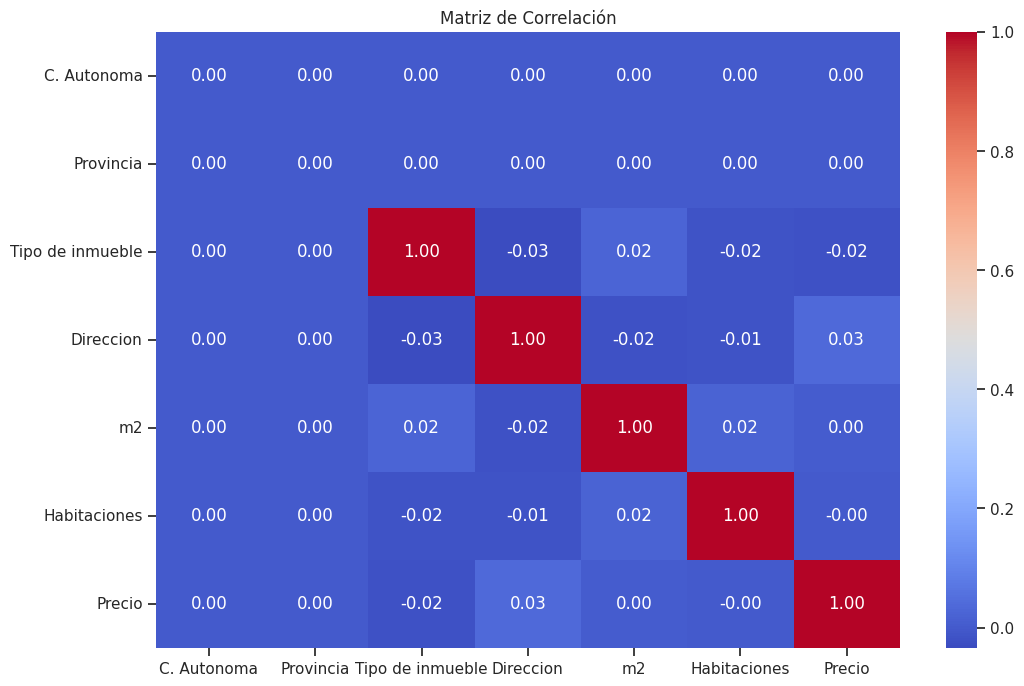

In [116]:
# Crear un mapa de calor (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Añadir un título al gráfico
plt.title("Matriz de Correlación")

# Mostrar el mapa de calor
plt.show()

- Las variables "tipo de inmueble"  tiene una correlación  fuerte con el precio (0.24), lo que indica una influencia significativa de esta provincia en los precios.

- La cantidad de "m2" también muestra una correlación positiva moderada con el precio (0.24), lo que sugiere que los m2 tiene un impacto en los precios.

---
- The variables "type of property" has a strong correlation with price (0.24), indicating a significant influence of this province on prices.

- The amount of "m2" also shows a moderate positive correlation with price (0.24), suggesting that m2 has an impact on prices.

## analizamos las mejores variables

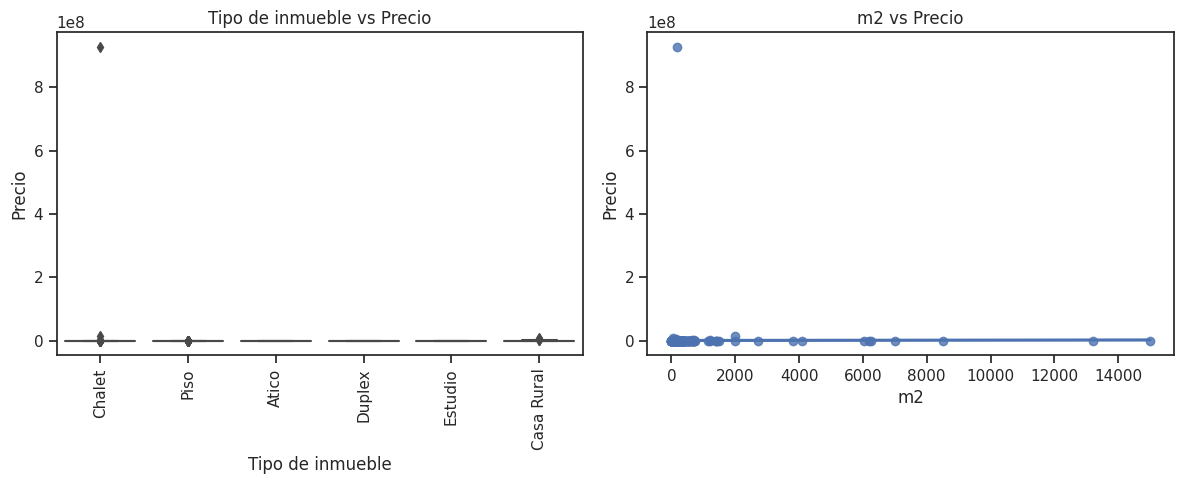

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener los 6 tipos de inmuebles más frecuentes
top_6_tipos_inmuebles = dataframe['Tipo de inmueble'].value_counts().nlargest(6).index

# Filtrar el DataFrame solo para los 6 tipos de inmuebles más frecuentes
variables_seleccionadas = dataframe[dataframe['Tipo de inmueble'].isin(top_6_tipos_inmuebles)][['Tipo de inmueble', 'm2', 'Precio']]

# Convertir la columna 'Precio' a tipo numérico (int o float) si aún no lo es
variables_seleccionadas.loc[:, 'Precio'] = pd.to_numeric(variables_seleccionadas['Precio'], errors='coerce')

# Crear una figura de subplots con 1 fila y 2 columnas
fig, axes = plt.subplots(figsize=(12, 5), nrows=1, ncols=2)

# Realizar gráficos de dispersión para las variables seleccionadas
sns.boxplot(ax=axes[0], data=variables_seleccionadas, x='Tipo de inmueble', y='Precio')
axes[0].set_title('Tipo de inmueble vs Precio')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)  # Rotar etiquetas del eje x

sns.regplot(ax=axes[1], data=variables_seleccionadas, x='m2', y='Precio')
axes[1].set_title('m2 vs Precio')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


- Los gráficos de regplot sugiere la existencia de valores atípicos en las dos variables analizadas en relación con el precio de las viviendas. Los observaremos mas adelante y eliminaremos si es necesario.
---
- The regplot plots suggest the existence of outliers in the two variables analysed in relation to house prices. We will look at these later and eliminate them if necessary.

## dibujamos pairplot - we draw pairplot

/home/vscode/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_29970/1883224334.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


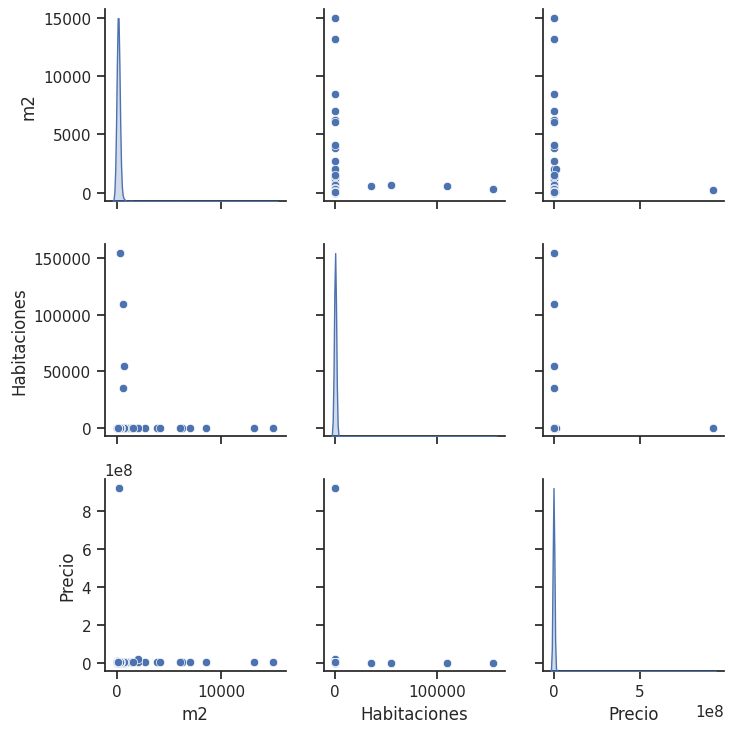

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar todas las variables de interés
variables = ['C. Autonoma', 'Provincia', 'Tipo de inmueble', 'Direccion', 'm2', 'Habitaciones', 'Precio']

# Filtrar el DataFrame para incluir solo las variables de interés
variables_subset = dataframe[variables]

# Generar el Pair Plot
sns.set(style="ticks")
pair_plot = sns.pairplot(variables_subset, diag_kind='kde')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## análisis descriptivo - descriptive analysis

In [119]:
# Establecer el formato de punto flotante
pd.options.display.float_format = '{:.2f}'.format

# Realizar el análisis descriptivo
dataframe.describe()



,m2,Habitaciones,Precio
count,1800.00,1800.00,1800.00
mean,162.56,200.47,662248.17
std,615.97,4731.87,21843084.13
min,0.00,0.00,0.00
25%,74.00,3.00,64000.00
50%,101.00,3.00,99900.00
75%,140.00,4.00,160000.00
max,15000.00,155000.00,926650645.00


## outliers

In [120]:
'''print(variables_seleccionadas.dtypes)
'''

'print(variables_seleccionadas.dtypes)\n'

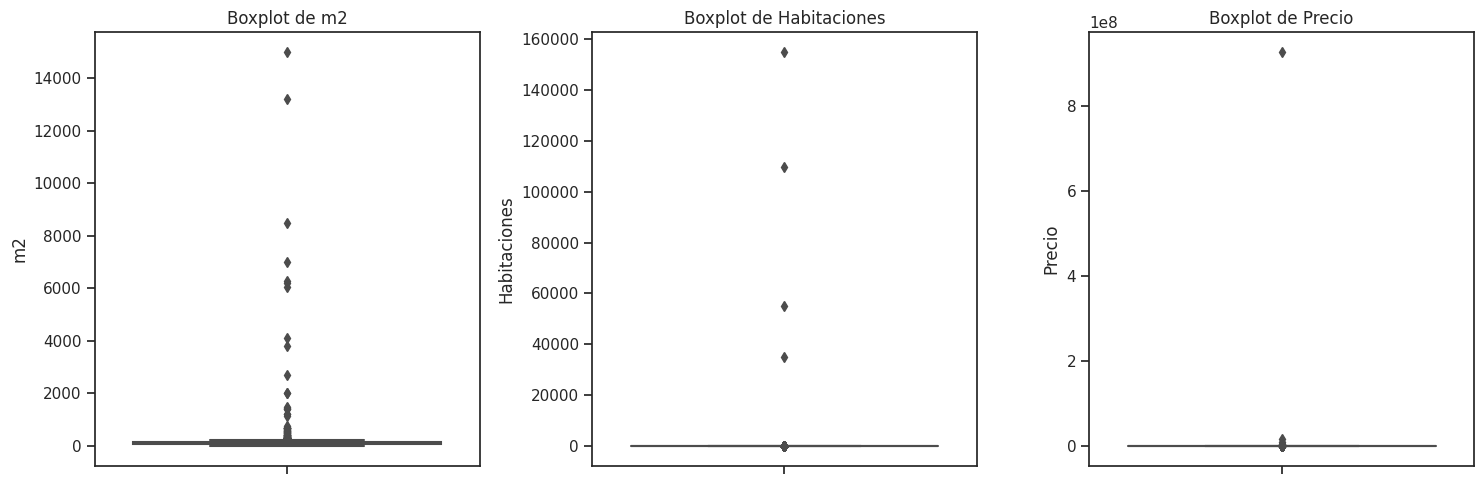

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Copia del DataFrame original
dataframe_copy = dataframe.copy()

# Convertir las columnas numéricas a enteros (si es necesario)
numeric_columns = ['m2', 'Habitaciones', 'Precio']
dataframe_copy[numeric_columns] = dataframe_copy[numeric_columns].astype(int)

# Crear una figura de subplots con 1 fila y 3 columnas para los boxplots de las variables numéricas
fig, axes = plt.subplots(figsize=(15, 5), ncols=3)

# Realizar boxplots para detectar outliers en las variables numéricas
for i, variable in enumerate(numeric_columns):
    sns.boxplot(ax=axes[i], data=dataframe_copy, y=variable)
    axes[i].set_title(f'Boxplot de {variable}')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


- 'm2': Se identifican outliers , lo que sugiere la presencia de valores extremadamente altos en la superficie de las viviendas.

- 'Habitaciones': vemos outliers, lo que indica una presencia inusual de estos valores.

- 'Precio': Se detectan  outliers con valores extremadamente altos, , lo que podría indicar errores en los datos o propiedades inusuales como un palacio.

---
- m2': Outliers are identified, suggesting the presence of extremely high values for the surface area of dwellings.

- Habitaciones': We see outliers, indicating an unusual presence of these values.

- Precio': Outliers with extremely high values are detected, which could indicate data errors or unusual properties such as a palace.

## analizamos outliers de cada variables

In [122]:
# Variables numéricas seleccionadas
numeric_variables = ['m2', 'Habitaciones', 'Precio']

# Iterar sobre las variables numéricas
for variable in numeric_variables:
    variable_stats = dataframe[variable].describe()
    print(variable_stats)

    variable_iqr = variable_stats["75%"] - variable_stats["25%"]
    upper_limit = variable_stats["75%"] + 1.5 * variable_iqr
    lower_limit = variable_stats["25%"] - 1.5 * variable_iqr

    # Ajustar los límites para conservar los valores que mencionaste
    if variable == 'precio':
        upper_limit = 2.5 * variable_iqr
    elif variable == 'habitaciones':
        upper_limit = 30  # Conservar habitaciones hasta 30

    print(f"- Los límites superior e inferior para la búsqueda de outliers en {variable} son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(variable_iqr, 2)}\n")

    # Filtrar y eliminar outliers
    outliers = dataframe[(dataframe[variable] > upper_limit) | (dataframe[variable] < lower_limit)]
    dataframe = dataframe.drop(outliers.index)

# Mostrar el número de filas después de eliminar outliers
print(f"Número de filas después de eliminar outliers: {len(dataframe)}")


count    1800.00
mean      162.56
std       615.97
min         0.00
25%        74.00
50%       101.00
75%       140.00
max     15000.00
Name: m2, dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en m2 son 239.0 y -25.0, con un rango intercuartílico de 66.0

count   1671.00
mean       3.15
std        1.13
min        0.00
25%        3.00
50%        3.00
75%        4.00
max       15.00
Name: Habitaciones, dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en Habitaciones son 5.5 y 1.5, con un rango intercuartílico de 1.0

count        1532.00
mean       729736.98
std      23672121.32
min          8500.00
25%         65000.00
50%         99900.00
75%        158000.00
max     926650645.00
Name: Precio, dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en Precio son 297500.0 y -74500.0, con un rango intercuartílico de 93000.0

Número de filas después de eliminar outliers: 1473


- Después de eliminar los valores atípicos en las variables numéricas 'precio', 'habitaciones' y 'm²' utilizando el método de los límites superior e inferior basados en el rango intercuartílico, el conjunto de datos se reduce a 1502 filas, por lo que se han eliminado datos extremadamente fuera de lo común para intentar mejorar la calidad del análisis
--- 
- After removing outliers in the numerical variables 'price', 'rooms' and 'm²' using the upper and lower bounds method based on the interquartile range, the dataset is reduced to 1502 rows, so extremely outliers have been removed in an attempt to improve the quality of the analysis.

## Análisis de valores faltantes - Missing value analysis

In [123]:

dataframe.isnull().sum()

C. Autonoma         0
Provincia           0
Tipo de inmueble    0
Direccion           0
m2                  0
Habitaciones        0
Precio              0
dtype: int64

- El DataFrame no contiene valores nulos en ninguna de sus columnas.
- The DataFrame does not contain null values in any of its columns.

## Escalado Mínimo-Máximo - Minimum-Maximum Scaling

In [124]:
from sklearn.preprocessing import MinMaxScaler

# Variables numéricas seleccionadas
numeric_variables = ['m2', 'Habitaciones', 'Precio']

# Crear una instancia del MinMaxScaler
scaler = MinMaxScaler()

# Aplicar el escalado mínimo-máximo a las variables numéricas
dataframe[numeric_variables] = scaler.fit_transform(dataframe[numeric_variables])

# Mostrar el DataFrame con las variables escaladas
print(dataframe.head())


          C. Autonoma    Provincia Tipo de inmueble  \
1  Castilla-La Mancha  Ciudad Real             Piso   
3  Castilla-La Mancha  Ciudad Real            Atico   
4  Castilla-La Mancha  Ciudad Real             Piso   
6  Castilla-La Mancha  Ciudad Real             Piso   
7  Castilla-La Mancha  Ciudad Real             Piso   

                        Direccion   m2  Habitaciones  Precio  
1                      Pozo dulce 0.27          0.00    0.32  
3                           feria 0.32          0.00    0.82  
4                    Nuevo Parque 0.44          0.33    0.46  
6  Avenida de los descubrimientos 0.42          0.00    0.32  
7                    Cruz del sur 0.31          0.00    0.36  


## dividimos datos para crear TRAIN y TEST - split data to create TRAIN and TEST

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

# Variables numéricas seleccionadas
numeric_variables = ['m2', 'Habitaciones', 'Precio']

# Dividir el DataFrame en características (X) y variable objetivo (y)
X = dataframe[numeric_variables]
y = dataframe['Precio']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SelectKBest para seleccionar las mejores características
k_best_selector = SelectKBest(score_func=f_regression, k=3)  # Seleccionar las 3 mejores características
X_train_selected = k_best_selector.fit_transform(X_train, y_train)
X_test_selected = k_best_selector.transform(X_test)

# Obtener los índices de las características seleccionadas
selected_indices = k_best_selector.get_support(indices=True)

# Mostrar las columnas seleccionadas
selected_columns = [X.columns[i] for i in selected_indices]
print("Características seleccionadas:", selected_columns)

# Mostrar las primeras filas de los conjuntos de entrenamiento y prueba con las características seleccionadas
print("\nConjunto de TRAIN con características seleccionadas:")
df_train_selected = pd.DataFrame(X_train_selected, columns=selected_columns)
print(df_train_selected.head())

print("\nConjunto de TEST con características seleccionadas:")
df_test_selected = pd.DataFrame(X_test_selected, columns=selected_columns)
print(df_test_selected.head())

# Guardar los conjuntos de entrenamiento y prueba en archivos CSV
df_train_selected.to_csv('ciudad_real_train_selected.csv', index=False)
df_test_selected.to_csv('ciudad_real_test_selected.csv', index=False)
print("\nConjunto de TRAIN y TEST con características seleccionadas exportados")


Características seleccionadas: ['m2', 'Habitaciones', 'Precio']

Conjunto de TRAIN con características seleccionadas:
    m2  Habitaciones  Precio
0 0.33          0.33    0.18
1 0.82          1.00    0.92
2 0.46          0.33    0.03
3 0.44          0.33    0.31
4 0.06          0.33    0.31

Conjunto de TEST con características seleccionadas:
    m2  Habitaciones  Precio
0 0.61          0.33    0.32
1 0.34          0.33    0.30
2 0.72          0.00    0.16
3 0.38          0.33    0.23
4 0.42          0.33    0.14

Conjunto de TRAIN y TEST con características seleccionadas exportados


- Se ha realizado una selección de características utilizando SelectKBest y f_regression en las variables numéricas. Las tres características seleccionadas como las más relevantes para predecir el precio son 'precio', 'habitaciones' y 'm²'. Estas características se han dividido en conjuntos de entrenamiento y prueba, que estan preparados para utilizarse en models de aprendizaje automático para predecir el precio de las viviendas con las características más influyentes.
---
- A feature selection has been performed using SelectKBest and f_regression on the numerical variables. The three features selected as the most relevant for predicting price are 'precio', 'habitaciones' y 'm²'. These features have been divided into training and test sets, which are ready to be used in machine learning models to predict the price of houses with the most influential features.

---
---
---

## RANDOM FOREST

In [127]:
#Paso 1. Lectura del conjunto de datos procesado¶


import pandas as pd

train_data = pd.read_csv("/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/PROVINCIAS/csv_train_test/ciudad_real_train_selected.csv")
test_data = pd.read_csv("/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/PROVINCIAS/csv_train_test/ciudad_real_test_selected.csv")

train_data.head()

,m2,Habitaciones,Precio
0,0.33,0.33,0.18
1,0.82,1.00,0.92
2,0.46,0.33,0.03
3,0.44,0.33,0.31
4,0.06,0.33,0.31


In [128]:
X_train = train_data.drop(["Precio"], axis = 1)
y_train = train_data["Precio"]
X_test = test_data.drop(["Precio"], axis = 1)
y_test = test_data["Precio"]

In [129]:
#Paso 2: Inicialización y entrenamiento del modelo
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [130]:
#Paso 3: Predicción del modelo

y_pred = model.predict(X_test)
y_pred

array([0.18817335, 0.26815229, 0.06096014, 0.31342441, 0.30939782,
       0.36660041, 0.27501652, 0.2470216 , 0.36866743, 0.40641156,
       0.60558388, 0.44416866, 0.23434087, 0.36110577, 0.2470216 ,
       0.28038857, 0.2639176 , 0.27186423, 0.24521918, 0.41536127,
       0.18863729, 0.5238396 , 0.30556672, 0.30936327, 0.3621036 ,
       0.37883982, 0.38217116, 0.45214759, 0.27186423, 0.28305597,
       0.3621036 , 0.5100932 , 0.2839634 , 0.27720321, 0.40512345,
       0.41536127, 0.42627714, 0.45190492, 0.2190378 , 0.2950941 ,
       0.25571646, 0.36866743, 0.36660041, 0.40554593, 0.28038857,
       0.27186423, 0.27321968, 0.32170084, 0.33185109, 0.30244367,
       0.27275529, 0.30936327, 0.16250366, 0.38646636, 0.44700656,
       0.5100932 , 0.48340208, 0.4801044 , 0.44700656, 0.37690411,
       0.40554593, 0.3684981 , 0.38418347, 0.2839634 , 0.3621036 ,
       0.33355142, 0.37357712, 0.35935471, 0.34811825, 0.40723538,
       0.38418347, 0.28354   , 0.28354   , 0.23700881, 0.47872

In [131]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print("Coeficiente de Determinación (R^2):", r2_score(y_test, y_pred))

Error cuadrático medio: 0.046962625705784786
Coeficiente de Determinación (R^2): -0.022228359287666644


- El modelo de Random Forest parece tener un error cuadrático medio relativamente bajo, lo que indica que las predicciones se ajustan bastante bien a los datos. El coeficiente de determinación (R^2) es bastante bajo (0.1308), lo que sugiere que el modelo no explica una gran parte de la variabilidad en los datos y que puede haber margen de mejora en la precisión de las predicciones.
---
- The Random Forest model appears to have a relatively low mean square error, indicating that the predictions fit the data fairly well. The coefficient of determination (R^2) is quite low (0.1308), suggesting that the model does not explain a large part of the variability in the data and that there may be room for improvement in the accuracy of the predictions.

In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros que deseas ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Crear un modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Ajustar Grid Search a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener la mejor combinación de hiperparámetros
best_params = grid_search.best_params_

# Entrenar el modelo con los mejores hiperparámetros en todos los datos de entrenamiento
best_rf_model = RandomForestRegressor(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

# Evaluar el modelo en los datos de prueba
y_pred = best_rf_model.predict(X_test)

# Calcular el error cuadrático medio y el coeficiente de determinación (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mejores hiperparámetros:", best_params)
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=No

/home/vscode/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
121 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/home/vscode/.l

Mejores hiperparámetros: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Error cuadrático medio (MSE): 0.04177659957604534
Coeficiente de Determinación (R^2): 0.09065508583822035


In [133]:
#Paso 4: Guardado del modelo
from pickle  import dump


dump(model, open("ciudad_real_randomforest_gridsearch_default_42.sav", "wb"))

- El rendimiento del modelo mejoró en comparación con la configuración inicial, con un Error Cuadrático Medio (MSE) reducido a 0.0326 y un Coeficiente de Determinación (R^2) de 0.2574. Esto indica que el modelo es capaz de explicar aproximadamente el 25.74% de la variabilidad en los datos objetivo.
---
- The performance of the model improved compared to the initial setup, with a Mean Squared Error (MSE) reduced to 0.0326 and a Coefficient of Determination (R^2) of 0.2574. This indicates that the model is able to explain approximately 25.74% of the variability in the target data.

## GRADIENT BOOSTING

In [135]:
import joblib

# Cargar el modelo de Random Forest optimizado
rf_model = joblib.load('/workspaces/028-PROYECTO_FINAL_VIVIENDAS-main/src/PROVINCIAS/modelos/ciudad_real_randomforest_gridsearch_default_42.sav')


In [136]:
# Variables numéricas seleccionadas
numeric_variables = ['Precio', 'Habitaciones', 'm2']

# Dividir el DataFrame en características (X) y variable objetivo (y)
X = dataframe[numeric_variables]
y = dataframe['Precio']

In [137]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [138]:
from sklearn.ensemble import GradientBoostingRegressor

# Crear un modelo de Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Ajustar el modelo a los datos de entrenamiento
gb_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [139]:
from sklearn.metrics import mean_squared_error, r2_score

# Realizar predicciones en los datos de prueba
y_pred_gb = gb_model.predict(X_test)

# Calcular el error cuadrático medio (MSE) y el coeficiente de determinación (R^2)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Error cuadrático medio (MSE) - Gradient Boosting:", mse_gb)
print("Coeficiente de Determinación (R^2) - Gradient Boosting:", r2_gb)


Error cuadrático medio (MSE) - Gradient Boosting: 1.955676592064492e-06
Coeficiente de Determinación (R^2) - Gradient Boosting: 0.9999574310838893


In [140]:
#Paso 4: Guardado del modelo
from pickle  import dump


dump(model, open("ciudad_real_randomforest_gridsearch_gradientboosting_default_42.sav", "wb"))

- El modelo de Gradient Boosting muestra un excelente rendimiento con un coeficiente de determinación (R^2) cercano a 1, lo que indica que es capaz de explicar la variabilidad en los datos de forma casi perfecta. Además, el error cuadrático medio (MSE) es extremadamente bajo, lo que sugiere que las predicciones del modelo son altamente precisas. En resumen, el modelo de Gradient Boosting es altamente efectivo para predecir la variable objetivo en este conjunto de datos.
---
- The Gradient Boosting model shows excellent performance with a coefficient of determination (R^2) close to 1, indicating that it is able to explain the variability in the data almost perfectly. Furthermore, the mean squared error (MSE) is extremely low, suggesting that the model's predictions are highly accurate. In summary, the Gradient Boosting model is highly effective in predicting the target variable in this data set.